<p align="center"> 
    <span style="font-family: Sans-serif; font-size:24px; font-weight: Bold;">Disney + Hotstar Content Exploratory Data Analysis.</span><br>
    <img src="https://raw.githubusercontent.com/Subhrajit91939/Handwashing-Data-Analysis/master/Disney%2BHotstar.jpg" alt="Disney+Hotstar Logo">
 </p>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/disney-hotstar-dataset/disney_plus_shows.csv


<span style="font-family: Sans-serif; font-size:20px; font-weight: Bold;">1. Importing all the necessary Libraries.</span> <br>

In [2]:
# Data analysis and wrangling.
import pandas as pd
import numpy as np

# Data Visualization:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

## Default fonts
mpl.rcParams['font.family'] = 'Sans-serif'

# Suppress all the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
disney = pd.read_csv('../input/disney-hotstar-dataset/disney_plus_shows.csv')
disney.shape

(992, 19)

In [4]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_id      894 non-null    object 
 1   title        894 non-null    object 
 2   plot         866 non-null    object 
 3   type         894 non-null    object 
 4   rated        742 non-null    object 
 5   year         894 non-null    object 
 6   released_at  874 non-null    object 
 7   added_at     992 non-null    object 
 8   runtime      838 non-null    object 
 9   genre        885 non-null    object 
 10  director     689 non-null    object 
 11  writer       743 non-null    object 
 12  actors       870 non-null    object 
 13  language     865 non-null    object 
 14  country      869 non-null    object 
 15  awards       556 non-null    object 
 16  metascore    292 non-null    float64
 17  imdb_rating  879 non-null    float64
 18  imdb_votes   879 non-null    object 
dtypes: float

In [5]:
disney.sample(5)

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"November 12, 2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"December 6, 2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,tt10196390,The World According to Jeff Goldblum,Documentary series in which Goldblum pulls bac...,series,TV-PG,2019–,12 Nov 2019,"November 12, 2019",NaN,"Documentary, Comedy",NaN,NaN,Jeff Goldblum,NaN,NaN,NaN,NaN,7.9,"1,121"
758,tt0072653,The Apple Dumpling Gang,Three orphan children strike gold in 1878 Cali...,movie,G,1975,01 Jul 1975,"November 12, 2019",100 min,"Comedy, Family, Western",Norman Tokar,"Don Tait (screenplay), Jack M. Bickham (book)","Bill Bixby, Susan Clark, Don Knotts, Tim Conway",English,USA,NaN,59.0,6.5,"4,710"
688,tt0105417,Sister Act,"When a worldly singer witnesses a mob crime, t...",movie,PG,1992,29 May 1992,"November 12, 2019",100 min,"Comedy, Crime, Family, Music",Emile Ardolino,Paul Rudnick,"Whoopi Goldberg, Maggie Smith, Kathy Najimy, W...",English,USA,Nominated for 2 Golden Globes. Another 9 wins ...,51.0,6.4,"83,764"


In [6]:
# Checking all the columns for any duplicates:

print(f"\nDisney+Hotstar dataset has: {disney.duplicated().sum()} Duplicate values")


Disney+Hotstar dataset has: 74 Duplicate values


<span style="font-family: Sans-serif; font-size:18px; font-weight: Regular;">we have a total of <strong>74 duplicates</strong> in the disney dataset.</span>

In [7]:
# Displaying all the columns with NaN values and the Percentage of NaN/NULL values:
nan_count = 0
for i in disney.columns:
    nan_perc = disney[i].isna().sum() / len(disney) * 100 
    if nan_perc > 0 :
        print(f"{i}'s NaN value = {nan_perc:.2f}%")
        nan_count += 1

print(f"\nTotal columns with NaN/NULL values: {nan_count} columns")

imdb_id's NaN value = 9.88%
title's NaN value = 9.88%
plot's NaN value = 12.70%
type's NaN value = 9.88%
rated's NaN value = 25.20%
year's NaN value = 9.88%
released_at's NaN value = 11.90%
runtime's NaN value = 15.52%
genre's NaN value = 10.79%
director's NaN value = 30.54%
writer's NaN value = 25.10%
actors's NaN value = 12.30%
language's NaN value = 12.80%
country's NaN value = 12.40%
awards's NaN value = 43.95%
metascore's NaN value = 70.56%
imdb_rating's NaN value = 11.39%
imdb_votes's NaN value = 11.39%

Total columns with NaN/NULL values: 18 columns


<span style="font-family: Sans-serif; font-size:18px; font-weight: Regular;"> Dataset contains a total of <strong>19 columns</strong>, out of which <strong>18 columns</strong> contain <strong>missing/NaN values</strong> and need cleaning.</span>
* <span style="font-family: Sans-serif; font-size:15px; font-weight: Regular;"> <strong>~9.88%</strong> of the rows in all the columns (Except <code>added_at</code> column) has <strong>NaN/NULL values</strong>, so we can saely drop that part from our dataframe.</span>
* <span style="font-family: Sans-serif; font-size:15px; font-weight: Regular;"><code>metascore</code> column has the most number of missing values <strong>~70.56%</strong>. It would be safe to drop the <code>metascore</code> column from the dataframe. As we already have 2 features when it comes to ratings for all the content available on the platform.</span>

<span style="font-family: Sans-serif; font-size:18px; font-weight: Regular;">Now, let us have a look at the <strong>Disney+</strong> data.</span>

In [8]:
disney.describe(include='all').head(4)

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
count,894,894,866,894,742,894,874,992,838,885,689,743,870,865,869,556,292.0,879.0,879
unique,894,872,865,3,17,178,800,58,128,366,465,710,817,72,59,258,NaN,NaN,818
top,tt0147800,Freaky Friday,The romantic tale of a sheltered uptown Cocker...,movie,G,2019,12 Nov 2019,"November 12, 2019",30 min,Documentary,Jack Hannah,"Bill Berg (story), Nick George (story)",Winston Hibler,English,USA,1 nomination.,NaN,NaN,47
freq,1,3,2,680,207,31,12,786,52,53,16,4,10,737,735,56,NaN,NaN,3


<span style="font-family: Sans-serif; font-size:18px; font-weight: Regular;">Cleaning the <strong>missing/NaN</strong> data.</span>
<br>
<span style="font-family: Sans-serif; font-size:16px; font-weight: Regular;">1. Dropping the <code>metascore</code> feature from the dataset.</span><br>
<span style="font-family: Sans-serif; font-size:16px; font-weight: Regular;">2. Dropping the <strong>~9.88%</strong> missing data from the dataset.</span>

In [9]:
disney = disney.drop(columns='metascore')

In [10]:
# dropping the 9.88% Missing data in the major columns.
disney = disney.dropna(subset=['imdb_id', 'title', 'type', 'year'])
disney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 991
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_id      894 non-null    object 
 1   title        894 non-null    object 
 2   plot         866 non-null    object 
 3   type         894 non-null    object 
 4   rated        742 non-null    object 
 5   year         894 non-null    object 
 6   released_at  874 non-null    object 
 7   added_at     894 non-null    object 
 8   runtime      838 non-null    object 
 9   genre        885 non-null    object 
 10  director     689 non-null    object 
 11  writer       743 non-null    object 
 12  actors       870 non-null    object 
 13  language     865 non-null    object 
 14  country      869 non-null    object 
 15  awards       556 non-null    object 
 16  imdb_rating  879 non-null    float64
 17  imdb_votes   879 non-null    object 
dtypes: float64(1), object(17)
memory usage: 132.7+ KB


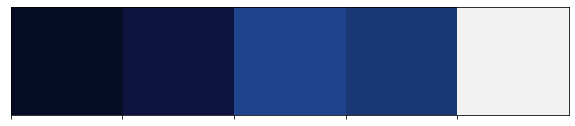

In [11]:
sns.palplot(['#070C26', '#0D1440', '#1F438C', '#193773', '#F2F2F2'], size=2)

<span style="font-family: Sans-serif; font-size:18px; font-weight: Regular;">Cleaning the columns and reassigning <strong>datatypes</strong>.</span>
<br>
<span style="font-family: Sans-serif; font-size:16px; font-weight: Regular;">1. The <code>year</code>, <code>released_at</code> and <code>added_at</code> columns should have <code>datetime</code> datatype.</span><br>
<span style="font-family: Sans-serif; font-size:16px; font-weight: Regular;">2. The <code>imdb_votes</code> column needs cleaning and converting the datatype to  <strong>int64</strong></span><br>
<span style="font-family: Sans-serif; font-size:16px; font-weight: Regular;">3. Convert the <code>type</code> and <code>rated</code> columns to <code>categorical</code> datatype.</span><br>

In [12]:
# Dealing with datatype for the imdb_votes column.
disney['imdb_votes'] = disney['imdb_votes'].apply(lambda x: "".join(str(x).split(',')))
disney['imdb_votes'] = disney['imdb_votes'].str.strip().astype('float').astype('Int64')

In [13]:
top_imdb_columns = ['title', 'type', 'rated', 'genre', 'language', 'imdb_rating', 'imdb_votes']
filt = (disney['imdb_votes'] > 1000)
disney.loc[filt, top_imdb_columns].sort_values(by=['imdb_rating'], ascending=False).head(10)

,title,type,rated,genre,language,imdb_rating,imdb_votes
807,The Imagineering Story,series,NaN,Documentary,NaN,9.1,1194
170,Gravity Falls,series,TV-Y7,"Animation, Action, Adventure, Comedy, Family, ...",English,8.9,63771
583,One Strange Rock,series,TV-PG,Documentary,"English, Spanish, Indonesian, Chinese, Arabic,...",8.8,5420
875,The Simpsons,series,TV-PG,"Animation, Comedy","English, Spanish, Albanian, French, Japanese, ...",8.7,328282
831,The Mandalorian,series,TV-PG,"Action, Adventure, Sci-Fi",English,8.7,157153
719,Star Wars: Episode V - The Empire Strikes Back,movie,PG,"Action, Adventure, Fantasy, Sci-Fi",English,8.7,1109656
712,Star Wars: Episode IV - A New Hope,movie,PG,"Action, Adventure, Fantasy, Sci-Fi",English,8.6,1188658
699,So Weird,series,TV-Y7,"Adventure, Family, Mystery, Thriller",English,8.5,2519
569,Disney's Newsies: The Broadway Musical!,movie,PG,Musical,English,8.5,1703
821,The Lion King,movie,G,"Animation, Adventure, Drama, Family, Musical","English, Swahili, Xhosa, Zulu",8.5,901362


In [14]:
# Top rated IMDB content on Disney+ 
# Filtered based on IMDB Ratings and IMDB votes
# Also: imdb_votes > 25000:
top_imdb_columns = ['title', 'type', 'rated', 'genre', 'language', 'imdb_rating', 'imdb_votes']
filt = (disney['imdb_votes'] > 25000)
disney.loc[filt, top_imdb_columns].sort_values(by=['imdb_rating', 'imdb_votes'], ascending=[False, False]).head(10)

,title,type,rated,genre,language,imdb_rating,imdb_votes
170,Gravity Falls,series,TV-Y7,"Animation, Action, Adventure, Comedy, Family, ...",English,8.9,63771
719,Star Wars: Episode V - The Empire Strikes Back,movie,PG,"Action, Adventure, Fantasy, Sci-Fi",English,8.7,1109656
875,The Simpsons,series,TV-PG,"Animation, Comedy","English, Spanish, Albanian, French, Japanese, ...",8.7,328282
831,The Mandalorian,series,TV-PG,"Action, Adventure, Sci-Fi",English,8.7,157153
712,Star Wars: Episode IV - A New Hope,movie,PG,"Action, Adventure, Fantasy, Sci-Fi",English,8.6,1188658
821,The Lion King,movie,G,"Animation, Adventure, Drama, Family, Musical","English, Swahili, Xhosa, Zulu",8.5,901362
956,WALL·E,movie,G,"Animation, Adventure, Family, Sci-Fi",English,8.4,955757
486,Avengers: Endgame,movie,PG-13,"Action, Adventure, Drama, Sci-Fi","English, Japanese, Xhosa, German",8.4,694527
128,Coco,movie,PG,"Animation, Adventure, Family, Fantasy, Music, ...","English, Spanish",8.4,333411
474,X-Men: The Animated Series,series,TV-Y7,"Animation, Action, Family, Sci-Fi, Thriller",English,8.4,36206


<span style="font-family: Sans-serif; font-size:24px; font-weight: Bold;"> References & Inspirations:</span><br>
<span style="font-family: Sans-serif; font-size:18px; font-weight: Bold;">1. <a href="https://www.kaggle.com/code/subinium/awesome-visualization-with-titanic-dataset/notebook">Awesome Visualization with Titanic Dataset by Subin An</a></span><br>
<span style="font-family: Sans-serif; font-size:18px; font-weight: Bold;">2. <a href="https://www.kaggle.com/code/subinium/all-you-need-is-pandas-benchmark-viz">All you need is Pandas📊(Benchmark Viz) by Subin An</a></span><br>
<span style="font-family: Sans-serif; font-size:18px; font-weight: Bold;">3. <a href="https://www.kaggle.com/code/subinium/storytelling-with-data-netflix-ver">🎬 Storytelling with Data - Netflix ver. by Subin An</a></span><br>
<span style="font-family: Sans-serif; font-size:18px; font-weight: Bold;">4. <a href="https://www.kaggle.com/code/kalilurrahman/disney-content-eda-analysis">🔥Disney+ Content - EDA Analysis 💥🎯🎬 By Kalilur Rahman</a></span><br>
<span style="font-family: Sans-serif; font-size:16px; font-weight: Bold;"><a href="https://2colors.colorion.co">Awesome color combos: Colorion</a></span>
